# L2.2 Как строить всякие графики

Построение графиков это такая тема, которую невозможно охватить всю. У вас всё равно будет когда-то пример, который здесь не охвачен.

matplotlib &mdash; не единственный пакет для построения графиков, правда чаще всего остальные графопостроители просто делают более удобную обёртку вокруг него. Для графиков, которые регулярно встречаются при анализе данных есть [bokeh](https://bokeh.pydata.org/en/latest/) и [seaborn](http://seaborn.pydata.org/examples/index.html).

Ну и конечно если у вас уже есть какой-то сторонний пакет или библиотека (origin, gnuplot, flot, d3js), с который вы уже умеете строить графики, может оказаться проще с помощью питона переформатировать данные, а отображение делать уже в том, в чём вы чувствуюте себя комфортней.

Однако не стоит забывать, что если у вас задача потоковой обработки данных, и данных много и хочется построить сразу много графиков, то скорее всего построить весь конвейер на питоне будет относительно просто.

**Disclaimer** большинство примеров здесь, конечно же, основаны на общедоступных туториалах и книгах. Nevertheless, все опечатки и не точности, что вы тут найдёте &mdash; на моей совести.

----

Первое, что надо сделать, когда работаешь с matplotlab в jupyter, это "включить" соответствующую магию. Тогда картинки будут отображаться прямо в тексте.

In [1]:
%matplotlib inline

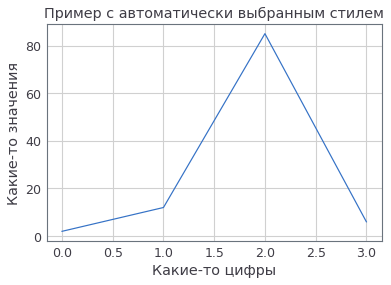

In [2]:
import matplotlib.pyplot as plt

plt.title("Пример с автоматически выбранным стилем")
plt.plot([2, 12, 85, 6])
plt.xlabel("Какие-то цифры")
plt.ylabel("Какие-то значения")
plt.show()

Команда `plot` достаточно умна и универсальна, ей можно скармливать данные в разных вариантах и она довольно часто будет делать то, что вы ожидаете.

* Когда на вход просто последовательность чисел, это воспринимается как значения по вертикальной оси, а по горизонтальной оси эти значения будут просто индексом (именно поэтому в примере выше у 2.0 значение 80
* Когда на вход две последовательности, то функция сначала соберёт пары (x, y), последовательно перебирая каждую из последовательностей

## Exercise 2.2.0

Попробуйте разные варианты вызова функции `plot` и посмотрите что получится

* передать три различные последовательности
* передать четыре различные последовательности
* передать последовательность кортежей (list of tuples)
* передать две последовательности, одна из которых короче другой

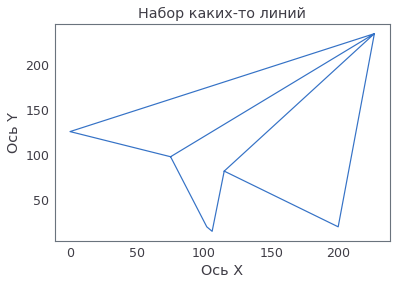

In [3]:
plt.plot(
    [75, 227, 0, 75, 102, 106, 115, 200, 227, 115],
    [97, 234, 125, 97, 19, 14, 81, 19, 234, 81]
)
plt.xlabel("Ось X")
plt.ylabel("Ось Y")
plt.title("Набор каких-то линий")
plt.grid(False)
plt.show()

Это очень удобно, когда вы пытаетесь построить функции, если вы примерно понимаете, в каком диапазоне и зачем, и помните как пользоваться `numpy`

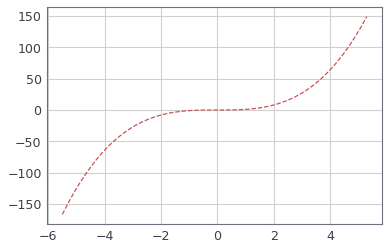

In [4]:
import numpy as np

xx = np.arange(-5.5, 5.5, 0.2)

plt.plot(xx, xx**3, 'r--')
plt.show()

Когда картинку надо сохранить в файл, вместо `plt.show` используйте `plt.savefig`. У команды есть некоторые дополнительные параметры, можно, например, указать dpi

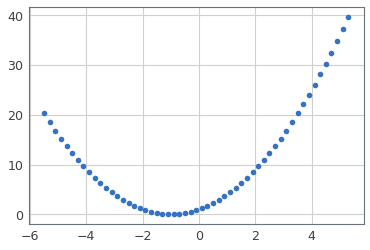

In [5]:
plt.plot(xx, xx**2 + 2*xx + 1, 'bo')
plt.savefig("cuboid.png")

## Как настроить внешний вид

Настроить можно много всего, например вид линии, длина штрихов, ширина, цвет, подписи, метки на осях ну и том подобное. Есть три способа задать свойства графика, ну и понятно многие из свойств можно установить несколькими способами.

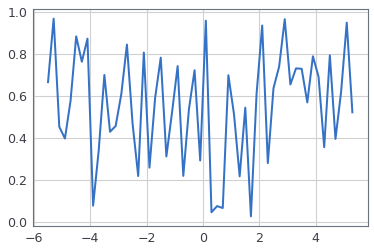

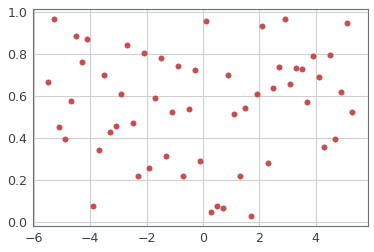

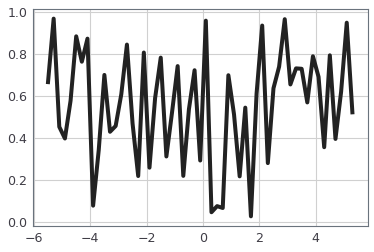

In [6]:
yy = np.random.rand(len(xx))

# через keyword аргументы когда вы закончили уже передавать данные
plt.plot(xx, yy, linewidth=2.0)
plt.show()

# через "третий аргумент". Здесь задаём что у нас красные точки
plt.plot(xx, yy, 'r.', markersize=12)
plt.show()

# можно разделить сам процесс набрасывания точек и финтифлюшки
line = plt.plot(xx, yy)
plt.setp(line, color="k", linewidth=4.0)
plt.show()

Вот некоторые из свойств, которые можно выставить у линии:

* alpha (float) регулирует прозрачность
* color (str) это цвет
* markersize (float) это размер значка
* linestyle стиль линии, например: '-', '--', '-.', ':'
* zorder (float) регулирует порядок графиков, когда у вас их несколько и вы хотите их особым образом накладывать друг на друга
* plt.xlim и plt.ylim позволяют задать диапазоны значений

Если вы уже что-то построили, можно посмотреть, с какими настройками это произошло, что с этим теперь будет, и, может, придумать что можно поменять

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array 
  alpha: float (0.0 transparent through 1.0 opaque) 
  animated: bool 
  antialiased or aa: bool 
  clip_box: a `.Bbox` instance 
  clip_on: bool 
  clip_path: [(`~matplotlib.path.Path`, `.Transform`) | `.Patch` | None] 
  color or c: any matplotlib color 
  contains: a callable function 
  dash_capstyle: ['butt' | 'round' | 'projecting'] 
  dash_joinstyle: ['miter' | 'round' | 'bevel'] 
  dashes: sequence of on/off ink in points 
  drawstyle: ['default' | 'steps' | 'steps-pre' | 'steps-mid' | 'steps-post'] 
  figure: a `.Figure` instance 
  fillstyle: ['full' | 'left' | 'right' | 'bottom' | 'top' | 'none'] 
  gid: an id string 
  label: object 
  linestyle or ls: ['solid' | 'dashed', 'dashdot', 'dotted' | (offset, on-off-dash-seq) | ``'-'`` | ``'--'`` | ``'-.'`` | ``':'`` | ``'None'`` | ``' '`` | ``''``]
  linewidth or lw: float value in points 
  marker: :mod:`A valid 

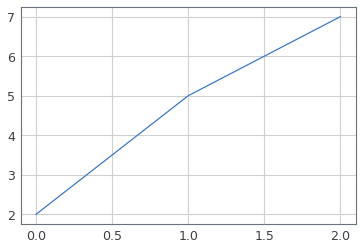

In [7]:
line = plt.plot([2, 5, 7])
plt.setp(line)

## Сразу несколько графиков

Иногда бывает надо показать зависимость нескольких переменных одновременно и неразрывно. На помощь приходит супер-хитрая система подграфиков в `matplotlib`. У неё замороченный синтаксис, но в примере внизу мы неявно определяем грид в 2 строчки 3 столбца и сначала рисуем 1 картинку в таком гриде, а потом пятую.

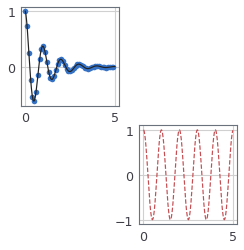

In [8]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.subplot(231)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(235)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()

## Exercise 2.2.1

Нарисуйте 5 графиков в шахматном порядке с помощью subplots в матрице 3x3, и сделайте раздельные подпсии к каждому из них

Можно рисовать сразу несколько графиков, это бывает удобно если у вас какая-то сложная логика их построения. В таком случае надо явно давать понять `matplotlib`-у, какой график вы собираетесь сейчас настроить 

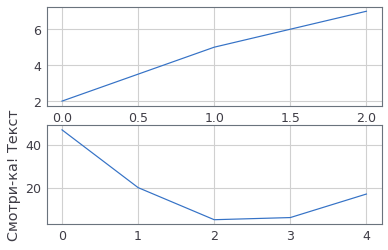

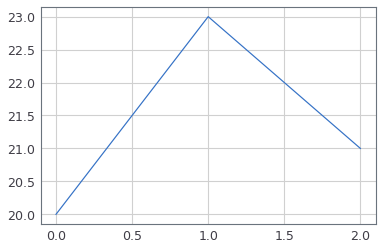

In [9]:
plt.figure(1)
plt.subplot(211)
plt.plot([2, 5, 7])
plt.subplot(212)
plt.plot([47, 20, 5, 6, 17])
plt.ylabel("Смотри-ка! Текст")

plt.figure(2)
plt.plot([20, 23, 21])

plt.show()

Для некоторых графиков полезно ещё перестраивать их в логарифмических осях, к примеру.

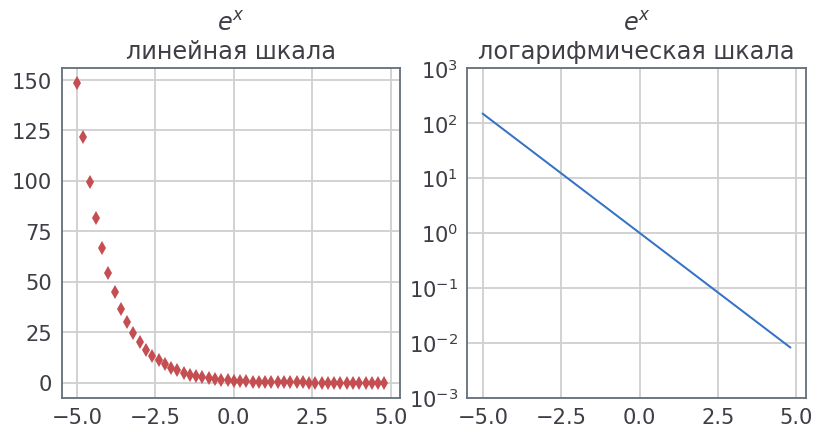

In [10]:
xx = np.arange(-5, 5, 0.2)
yy = np.exp(-xx)

plt.figure(figsize=(8, 8), dpi=120)

plt.subplot(221)
plt.plot(xx, yy, 'rd')
plt.yscale('linear')
plt.title('$e^x$\nлинейная шкала')
plt.grid(True)


# log
plt.subplot(222)
plt.plot(xx, yy)
plt.ylim(1E-3, 1E3)
plt.yscale('log')
plt.title('$e^x$\nлогарифмическая шкала')
plt.grid(True)

## Другие виды графиков

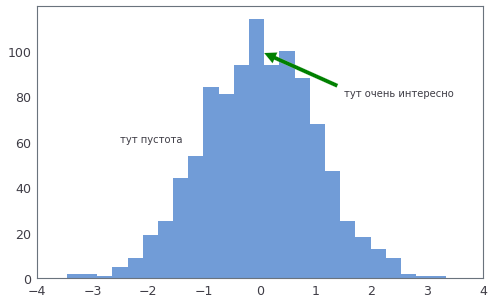

In [11]:
xx = np.random.normal(size=1000)

plt.figure(figsize=(8, 5))
plt.hist(xx, bins=25, alpha=0.7)
plt.text(-2.5, 60, "тут пустота")
plt.xlim(-4, 4)
plt.annotate(
    'тут очень интересно', xy=(0, 100), xytext=(1.5, 80),
    arrowprops=dict(facecolor="green", shrink=0.05)
)
plt.grid(False)
plt.show()

К графикам также можно добавлять легенду

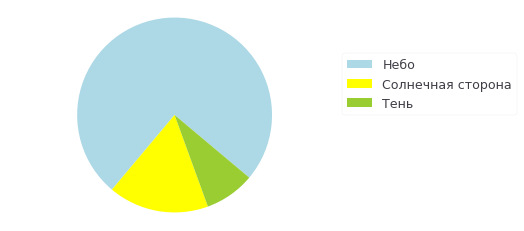

In [12]:
labels = ["Небо", "Солнечная сторона", "Тень"]
sizes = [270, 60, 30] # будет отмасштабировано
colors = ["lightblue", "yellow", "yellowgreen"]

plt.pie(sizes, colors=colors, startangle=-40)
plt.axis("equal")
plt.legend(labels, loc=(1, 0.5))
plt.show()

К сожалению, для сложных случаев всё равно надо сильно заморочиться, без этого не получится.
Ниже чуток подтюненый пример из документации scipy, детально состоящий из нескольких частей: мы определили функцию, определили грид и синтерполировали грид на доступные точные значения.

Пример скорее демонстрационный, не переживайте если наскоком не всё поймёте

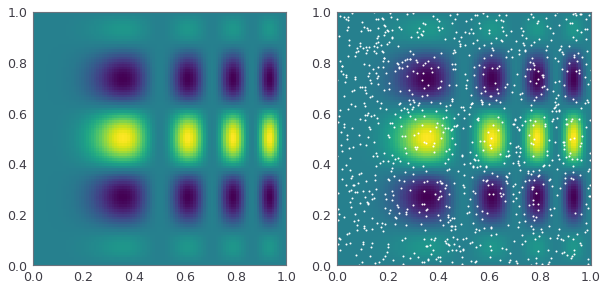

In [14]:
from scipy.interpolate import griddata

XMIN, XMAX, YMIN, YMAX = 0, 1, 0, 1

def func(x, y):    
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2
    #return x * np.exp(-x**2 - y**2)

# пусть у нас есть грид
grid_x, grid_y = np.mgrid[XMIN:XMAX:100j, YMIN:YMAX:100j]

points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

zi = griddata(points, values, (grid_x, grid_y), method="linear")
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(func(grid_x, grid_y), extent=(XMIN, XMAX, YMIN, YMAX))
plt.ylim(XMIN, XMAX)
plt.xlim(YMIN, YMAX)
plt.grid(False)


plt.subplot(122)
plt.imshow(func(grid_x, grid_y), extent=(XMIN, XMAX, YMIN, YMAX))

plt.plot(points[:,0], points[:,1], 'w.', ms=4)
plt.ylim(XMIN, XMAX)
plt.xlim(YMIN, YMAX)
plt.grid(False)
plt.show()

## Подогнать под данные функцию

Нужна функция, данные и `scipy.optimize.curve_fit` сделает всё за вас

6.873*sin(2.005)*x


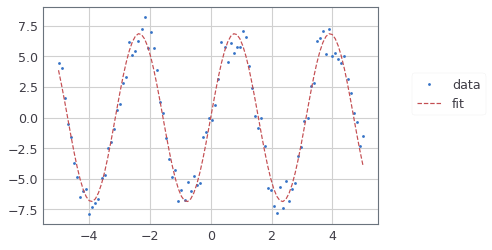

In [15]:
from scipy.optimize import curve_fit

x_data = np.linspace(-5, 5, num=100)
y_data = 7 * np.sin(2 * x_data) + np.random.normal(size=100)

def test_func(x, a, b):
    return a * np.sin(b * x)

params, params_covariance = curve_fit(
    test_func, x_data, y_data, p0=[2, 2]
)
print(f"{params[0]:.3f}*sin({params[1]:.3f})*x")

plt.plot(x_data, y_data, '.')
plt.plot(
    x_data,
    [test_func(x, params[0], params[1]) for x in x_data],
    'r--'
)
plt.legend(["data", "fit"], loc=(1.1, 0.5))
plt.show()

У `scipy.optimize` есть ещё полезные функции для нахождения минимумов, поиска корней, и тому подобного 

## Exercise 2.2.1

Теперь у нас всё есть, чтобы построить что-нибудь про наш iris dataset.
Например, вот такие три графика:

* Отобразить на графике (x, y) все наблюдения по sepal length/width
* То же самое для petal length/width
* Покрасить разные виды ирисов разными цветами

## Exercise 2.2.2

Постройте график численности населения Архангельска за весь период наблюдения, что сможете найти в интернете. Подпишите красными стрелочками какие-нибудь изгибы.

## Статистические графики с seaborn

[seaborn](https://seaborn.pydata.org) это надстройка над matplotlib, у которого куча встроенных удобных определённых графиков уже настроено. Иногда там есть то, что в "голом" matplotlib может быть построить муторно.

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


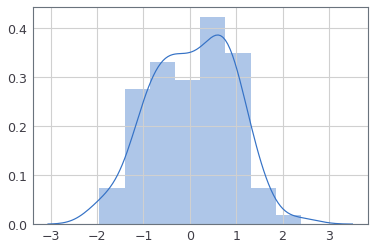

In [16]:
import seaborn as sns

values = np.random.normal(size=100)
sns.distplot(values);

/usr/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


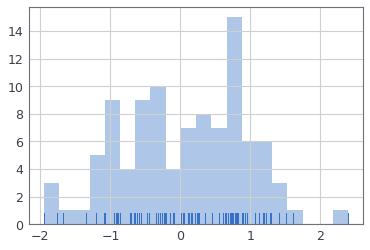

In [17]:
sns.distplot(values, bins=20, kde=False, rug=True);

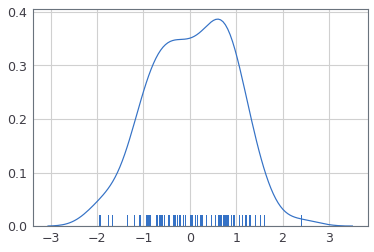

In [18]:
sns.distplot(values, hist=False, rug=True);

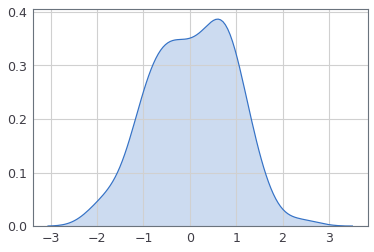

In [19]:
sns.kdeplot(values, shade=True);

Что такое Kernel Density Estimation можно почитать в [википедии](https://en.wikipedia.org/wiki/Kernel_density_estimation)

## Exercise 2.2.3

Помните наш модуль iris_reader из раздела 1.5? Попробуйте добавить к нему функцию plot, которая будет принимать на вход лейбл оси и вид ириса, а в результате рисовать то, что есть в датасете.

В принципе этого должно быть достаточно для большинства основных графиков которые вы когда-либо захотите построить. Конечно, наверняка вас ожидает ситуация когда под какой-то график придётся очень сильно заморочиться, но такие примеры нельзя рассмотреть в рамках вводного курса (да и вообще любого). Поэтому, прежде чем что-то визуализировать, обязательно проверяйте документацию к вашему пакету для построения графиков.

Глобально, вы можете полноценно считать что теперь умеете строить основные графики и анализировать их вид. Конечно, основная задача при анализе данных это находить в них интересные особенности, а не только визуализировать, но визуализация это важный инструмент разведочного анализа (ну вообще, конечно, не только его)

// IM